<a href="https://colab.research.google.com/github/Khuks/Predicting-Aggregate-Liquidity-For-A-Central-Bank-Using-Machine-Learning-Algorithms-/blob/main/Copy_of_Predicting_Aggregate_Liquidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing

## Import Libraries

In [228]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
import math
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Load in the dataset

In [229]:
# Import SARB dataset

uploaded=files.upload()
dataa=pd.read_excel(io.BytesIO(uploaded['SARB.xlsx']),parse_dates=True,index_col=0)
print(dataa)

Saving SARB.xlsx to SARB (1).xlsx
            Total liquid Assets  Cash and Deposits with CBS  \
Date                                                          
2022-09-01              1191611                     4664530   
2022-08-01              1153150                     4633017   
2022-07-01              1164416                     4566096   
2022-06-01              1140303                     4448948   
2022-05-01              1142845                     4475422   
...                         ...                         ...   
1966-08-01                  742                        5256   
1966-07-01                  708                        5268   
1966-06-01                  820                        5215   
1966-05-01                  501                        5080   
1966-04-01                  579                        5019   

            Loans and advances  Government Securities  Total Deposits  \
Date                                                                    


In [230]:
dataset = pd.DataFrame(dataa)

#### Display the first five rows 

In [231]:
dataset.head()

,Total liquid Assets,Cash and Deposits with CBS,Loans and advances,Government Securities,Total Deposits,Required Liquidity,Actual Liquidity to Domestic Liabilities (%),Loans and Advances to Deposits(%),M1,M2,Currency outside depository corporations,Demand deposits,Quasi Money
Date,,,,,,,,,,,,,
2022-09-01,1191611,4664530,4032345,30381,4502731,4411197,11.31,10.46,2429923,3828429,353308,4908637,4647000
2022-08-01,1153150,4633017,3999125,25459,4473997,4360925,9.96,9.46,2428128,3789888,349666,4870965,4586933
2022-07-01,1164416,4566096,3933912,43759,4402130,4297918,8.08,8.25,2399514,3726652,309638,4763081,4549408
2022-06-01,1140303,4448948,3900423,20688,4289965,4280941,8.66,8.29,2338822,3622203,310893,4635127,4473180
2022-05-01,1142845,4475422,3848413,23706,4316521,4219158,6.13,6.85,2378735,3681214,310126,4664730,4466116


#### Display the shape of the dataset

In [232]:
# We will display the shape of the dataset
dataset.shape

(677, 13)

The are 140 rows in the dataset and 18 columns.

#### Print the information of the dataset

In [233]:
# The pandas dataframe.info() function is used to get a  concise summary of the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 677 entries, 2022-09-01 to 1966-04-01
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total liquid Assets                           677 non-null    int64  
 1   Cash and Deposits with CBS                    677 non-null    int64  
 2   Loans and advances                            677 non-null    int64  
 3   Government Securities                         677 non-null    int64  
 4   Total Deposits                                677 non-null    int64  
 5   Required Liquidity                            677 non-null    int64  
 6   Actual Liquidity to Domestic Liabilities (%)  677 non-null    float64
 7   Loans and Advances to Deposits(%)             677 non-null    float64
 8   M1                                            677 non-null    int64  
 9   M2                                            

#### Check for statistics

In [234]:
# The describe() method returns description of the data in the DataFrame.
dataset.describe()

,Total liquid Assets,Cash and Deposits with CBS,Loans and advances,Government Securities,Total Deposits,Required Liquidity,Actual Liquidity to Domestic Liabilities (%),Loans and Advances to Deposits(%),M1,M2,Currency outside depository corporations,Demand deposits,Quasi Money
count,6.770000e+02,6.770000e+02,6.770000e+02,677.000000,6.770000e+02,6.770000e+02,677.000000,677.000000,6.770000e+02,6.770000e+02,677.000000,6.770000e+02,6.770000e+02
mean,2.328837e+05,9.577681e+05,9.022189e+05,4244.106352,9.213606e+05,9.744140e+05,13.115938,13.289350,4.492526e+05,7.856830e+05,67525.475628,1.027877e+06,9.578034e+05
std,3.198381e+05,1.289114e+06,1.187631e+06,8967.008897,1.249184e+06,1.289651e+06,6.539135,7.331436,6.375321e+05,1.048897e+06,91174.146427,1.377738e+06,1.288967e+06
min,5.010000e+02,5.019000e+03,3.730000e+03,-40971.000000,4.195000e+03,4.051000e+03,-2.890000,-1.620000,1.603000e+03,3.211000e+03,517.000000,4.891000e+03,5.046000e+03
25%,5.469000e+03,3.047200e+04,2.206600e+04,150.000000,2.105800e+04,2.568400e+04,8.010000,8.200000,7.153000e+03,1.857300e+04,2730.000000,2.999300e+04,3.048600e+04
50%,5.249900e+04,2.272120e+05,2.305730e+05,853.000000,2.125710e+05,2.464490e+05,12.270000,12.140000,8.958800e+04,1.997700e+05,17105.000000,2.638110e+05,2.294340e+05
75%,3.987110e+05,1.851960e+06,1.847780e+06,4526.000000,1.801205e+06,1.943620e+06,18.270000,17.660000,7.446850e+05,1.484679e+06,112045.000000,1.971045e+06,1.839403e+06
max,1.193347e+06,4.664530e+06,4.032345e+06,59424.000000,4.502731e+06,4.411197e+06,30.050000,35.720000,2.429923e+06,3.828429e+06,353308.000000,4.908637e+06,4.647000e+06


#### Evaluating Missing Values

In [235]:
# We will use .isnull().sum() to dertemine how many missing values exist in the collection, in which case you can use .sum() chained on.
dataset.isnull().sum()

Total liquid Assets                             0
Cash and Deposits with CBS                      0
Loans and advances                              0
Government Securities                           0
Total Deposits                                  0
Required Liquidity                              0
Actual Liquidity to Domestic Liabilities (%)    0
Loans and Advances to Deposits(%)               0
M1                                              0
M2                                              0
Currency outside depository corporations        0
Demand deposits                                 0
Quasi Money                                     0
dtype: int64

In [236]:

dataset=dataset.dropna()
dataset.isnull().sum()

Total liquid Assets                             0
Cash and Deposits with CBS                      0
Loans and advances                              0
Government Securities                           0
Total Deposits                                  0
Required Liquidity                              0
Actual Liquidity to Domestic Liabilities (%)    0
Loans and Advances to Deposits(%)               0
M1                                              0
M2                                              0
Currency outside depository corporations        0
Demand deposits                                 0
Quasi Money                                     0
dtype: int64

In [237]:
dataset0=dataset

In [238]:
dataset1=dataset.drop(columns=['Total liquid Assets'])

In [239]:
# list(data) or
exogenous_features =list(dataset1.columns)

# 2. Exploratory Data Analysis

#### 2.1 Univarite Analysis


In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

##### a) Target Variable 

We will first look at the target variable, i.e., Total Liquid Assets.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.


In [240]:
dataset["Total liquid Assets"].count()

677

The size of our target variable is : 678

In [241]:
dataset["Total liquid Assets"].sum()

157662241

The sum of the values of the target variable is : 157 663 250 

In [242]:
# Determine the average of the Total liquid Assets
dataset["Total liquid Assets"].mean()

232883.6646971935

#### Plot the trend for the Total Liquid Assets

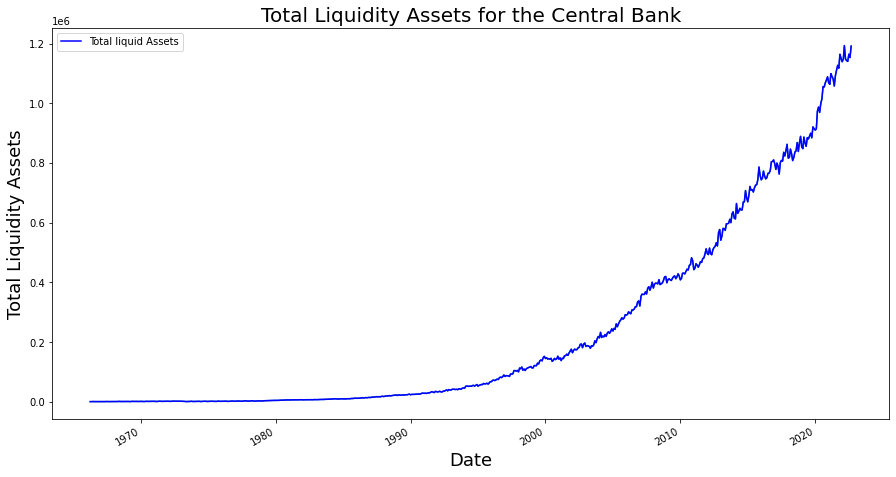

In [243]:
#Plotting the closing price as from  2005-11-16 to 2020-11-13
plt.figure(figsize=(15,8))
plt.grid(True)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Liquidity Assets',fontsize=18)
plt.locator_params(axis="y", integer=True, tight=True)
plt.plot(dataset['Total liquid Assets'])
plt.title('Total Liquidity Assets for the Central Bank',fontsize=20)
dataset['Total liquid Assets'].plot(legend = True,color='b')
plt.show()

##### Plot the Total Liquid Assets Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


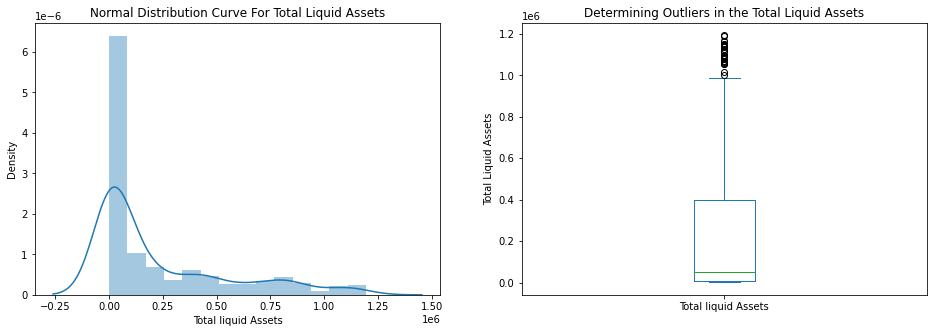

In [244]:
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Total Liquid Assets")
sns.distplot(dataset["Total liquid Assets"]);


plt.subplot(122)
dataset["Total liquid Assets"].plot.box(figsize=(16,5))
plt.title("Determining Outliers in the Total Liquid Assets")
plt.ylabel("Total Liquid Assets")
plt.show()

It can be inferred that most of the data in the distribution of Total Liquid Assets is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values.


#### b) Independent Variable (Numerical)


Numerical features: These features have numerical values (Total liquid Assets	,Cash and Deposits with CBS,	Loans and advances, Total Deposits,Required Liquidity,	Actual Liquidity to Domestic Liabilities (%),	Loans and Advances to Deposits(%),	M1,	M2,	Currency outside depository corporations,	Demand deposits,	Quasi Money)



In [245]:
grouped_data = pd.DataFrame({'Cash and Deposits with CBS': dataset['Cash and Deposits with CBS'], 
                             'Loans and advances': dataset['Loans and advances'],
                             'Total Deposits': dataset['Total Deposits'],
                             'Required Liquidity': dataset['Required Liquidity'], 
                             'M1': dataset['M1'], 
                             'M2': dataset['M2'], 
                             'Demand deposits': dataset['Demand deposits'], 
                             'Quasi Money': dataset['Quasi Money']})
grouped_data.head()

,Cash and Deposits with CBS,Loans and advances,Total Deposits,Required Liquidity,M1,M2,Demand deposits,Quasi Money
Date,,,,,,,,
2022-09-01,4664530,4032345,4502731,4411197,2429923,3828429,4908637,4647000
2022-08-01,4633017,3999125,4473997,4360925,2428128,3789888,4870965,4586933
2022-07-01,4566096,3933912,4402130,4297918,2399514,3726652,4763081,4549408
2022-06-01,4448948,3900423,4289965,4280941,2338822,3622203,4635127,4473180
2022-05-01,4475422,3848413,4316521,4219158,2378735,3681214,4664730,4466116


##### i) Cash and Deposits with CBS

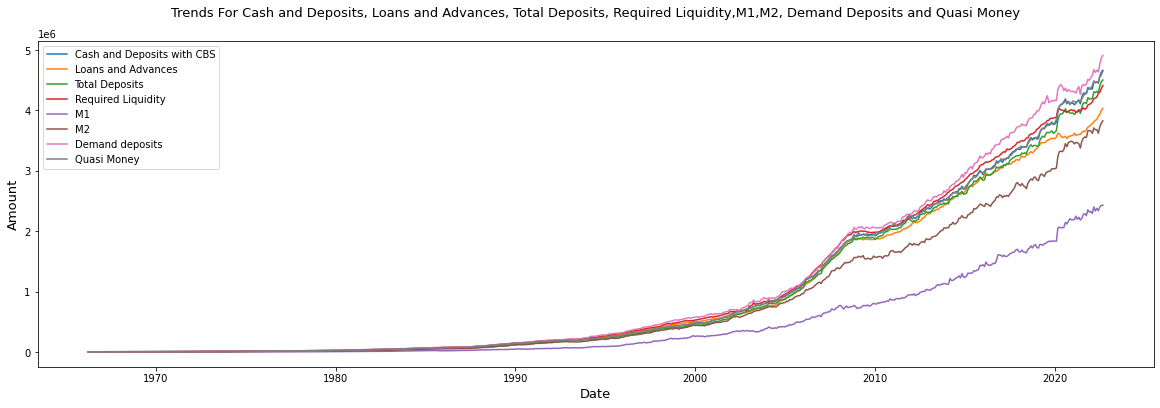

In [246]:

#WHL.JO
#Visualising the Open, High,Low, Close and Adjusted Close

#We have removed the Volume so that the treand is clear
plt.figure(figsize=(20,6))
plt.ylabel('Amount', fontsize=13)
plt.xlabel('Date',fontsize=13)
plt.title("Trends For Cash and Deposits, Loans and Advances, Total Deposits, Required Liquidity,M1,M2, Demand Deposits and Quasi Money", fontsize=13,pad=24)
plt.plot(grouped_data)
plt.legend(['Cash and Deposits with CBS',
            'Loans and Advances',
            'Total Deposits',
            'Required Liquidity',
            'M1',
            'M2',
            'Demand deposits',
            'Quasi Money'],
           loc="upper left")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


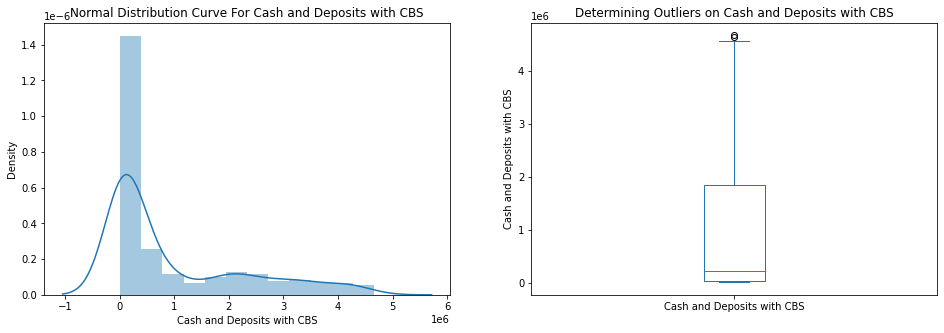

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


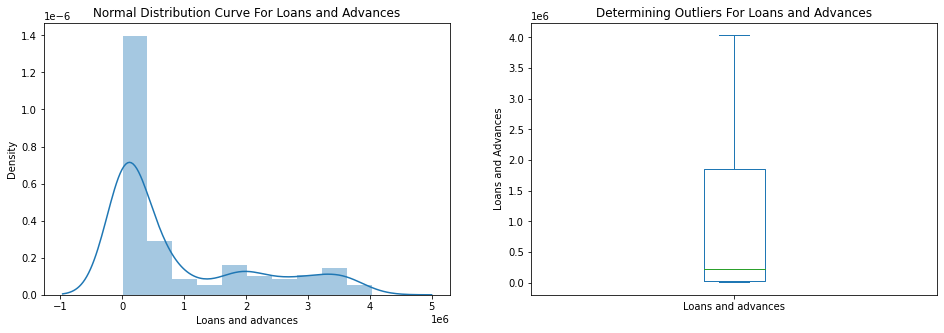

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


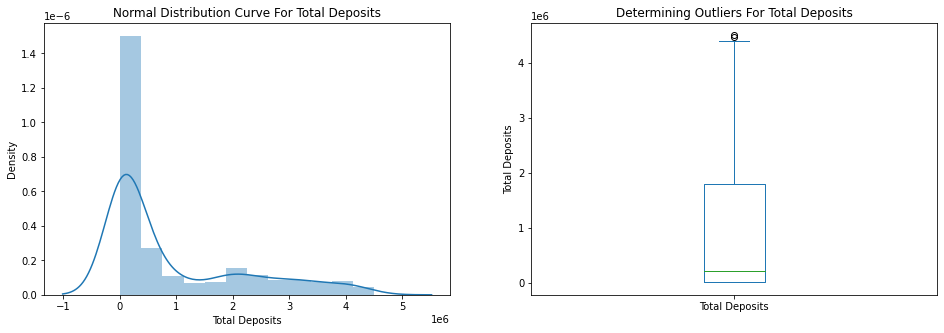

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


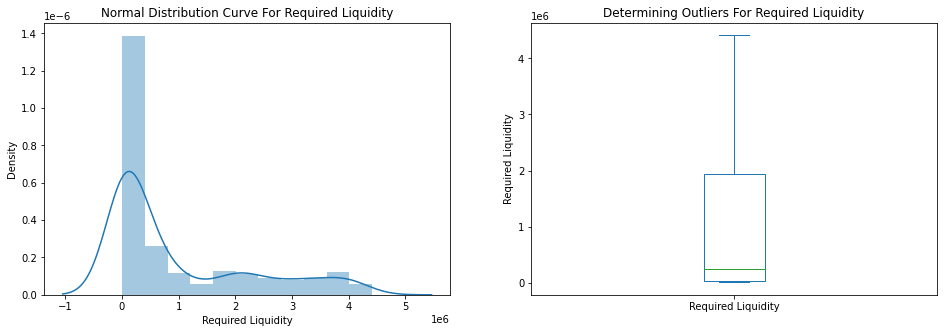

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


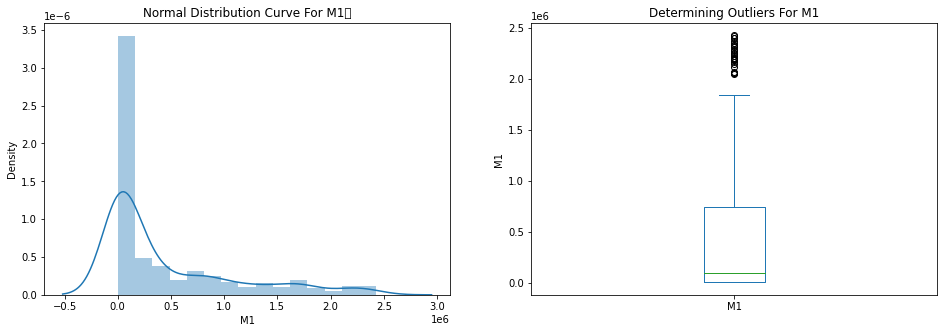

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


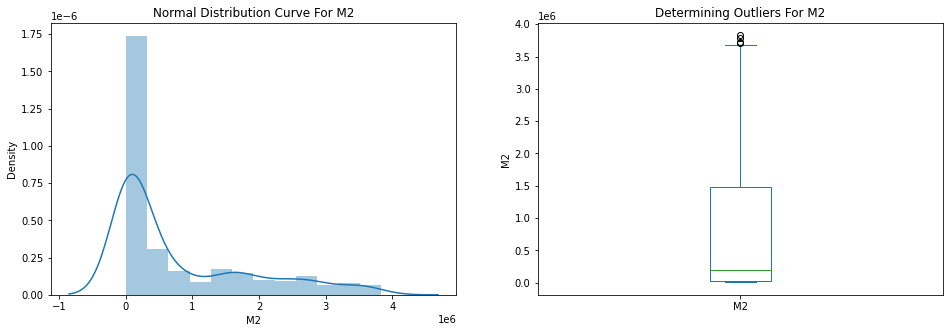

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


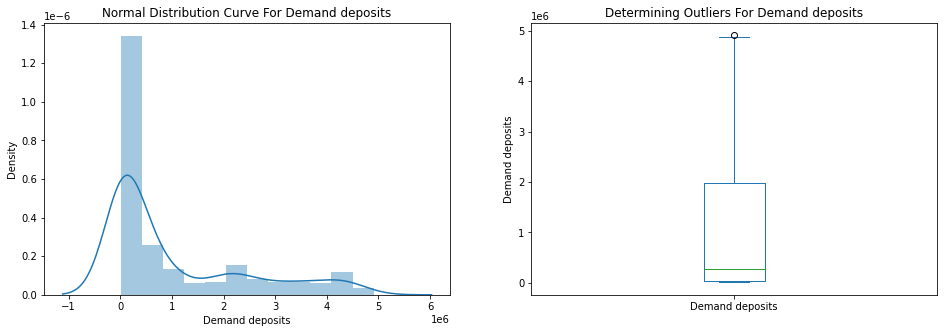

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


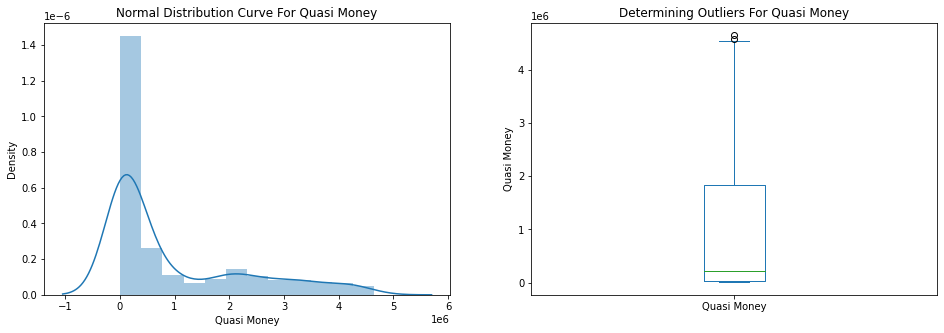

In [247]:
# Plot the distribution for Cash and Deposits with CBS
# We first plot the Normal Distribution Curve for Cash and Deposits with CBS
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Cash and Deposits with CBS")
sns.distplot(dataset["Cash and Deposits with CBS"]);

# Then plot the box plot for Cash and Deposits with CBS
plt.subplot(122)
dataset["Cash and Deposits with CBS"].plot.box(figsize=(16,5))
plt.title("Determining Outliers on Cash and Deposits with CBS")
plt.ylabel("Cash and Deposits with CBS")
plt.show()


# Plot the normal Distribution curve for Loans and Advances
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Loans and Advances")
sns.distplot(dataset["Loans and advances"]);

# Plot the Box plot for Loans and Advances
plt.subplot(122)
dataset["Loans and advances"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Loans and Advances")
plt.ylabel("Loans and Advances")
plt.show()


# Plot the normal Distribution curve for Loans and Advances
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Total Deposits")
sns.distplot(dataset["Total Deposits"]);

# Plot the Box plot for Loans and Advances
plt.subplot(122)
dataset["Total Deposits"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Total Deposits")
plt.ylabel("Total Deposits")
plt.show()

	
# Plot the normal Distribution curve for Loans and Advances
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Required Liquidity")
sns.distplot(dataset["Required Liquidity"]);

# Plot the Box plot for Loans and Advances
plt.subplot(122)
dataset["Required Liquidity"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Required Liquidity")
plt.ylabel("Required Liquidity")
plt.show()

# Plot the normal Distribution curve for Loans and Advances
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For M1	")
sns.distplot(dataset["M1"]);

# Plot the Box plot for Loans and Advances
plt.subplot(122)
dataset["M1"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For M1")
plt.ylabel("M1")
plt.show()

# Plot the normal Distribution curve for Loans and Advances
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For M2")
sns.distplot(dataset["M2"]);

# Plot the Box plot for Loans and Advances
plt.subplot(122)
dataset["M2"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For M2")
plt.ylabel("M2")
plt.show()

# Plot the normal Distribution curve for Loans and Advances
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Demand deposits")
sns.distplot(dataset["Demand deposits"]);

# Plot the Box plot for Loans and Advances
plt.subplot(122)
dataset["Demand deposits"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Demand deposits")
plt.ylabel("Demand deposits")
plt.show()


# Plot the normal Distribution curve for Loans and Advances
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Quasi Money")
sns.distplot(dataset["Quasi Money"]);

# Plot the Box plot for Loans and Advances
plt.subplot(122)
dataset["Quasi Money"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Quasi Money")
plt.ylabel("Quasi Money")
plt.show()


##### Plot the Government Securities Distribution

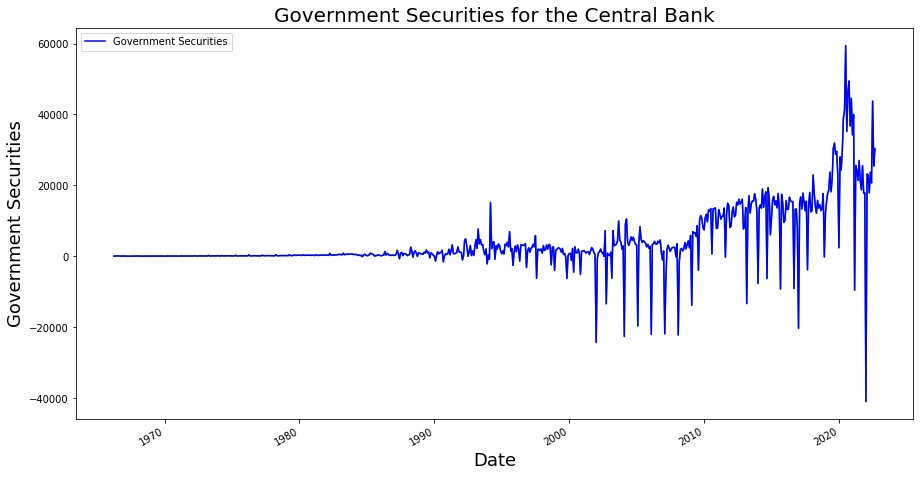

In [248]:
#Plotting the closing price as from  2005-11-16 to 2020-11-13
plt.figure(figsize=(15,8))
plt.grid(True)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Government Securities',fontsize=18)
plt.locator_params(axis="y", integer=True, tight=True)
plt.plot(dataset['Government Securities'])
plt.title('Government Securities for the Central Bank',fontsize=20)
dataset['Government Securities'].plot(legend = True,color='b')
plt.show()

##### Plot the Government Securities Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


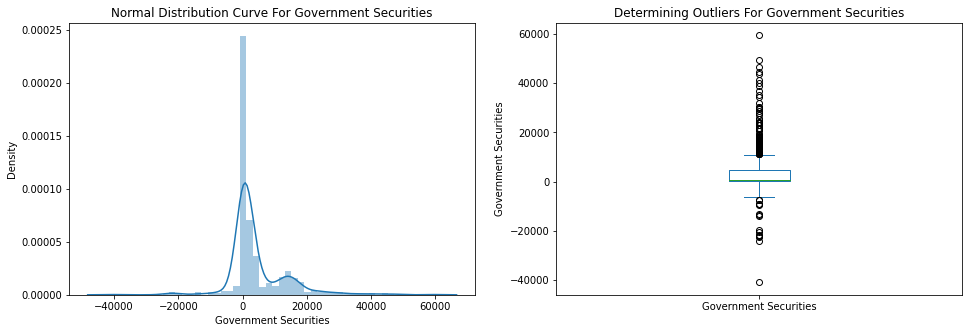

In [249]:
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Government Securities")
sns.distplot(dataset["Government Securities"]);


plt.subplot(122)
dataset["Government Securities"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Government Securities")
plt.ylabel("Government Securities")
plt.show()

##### Plot the trend for Actual Liquidity to Domestic Liabilities (%) Distribution

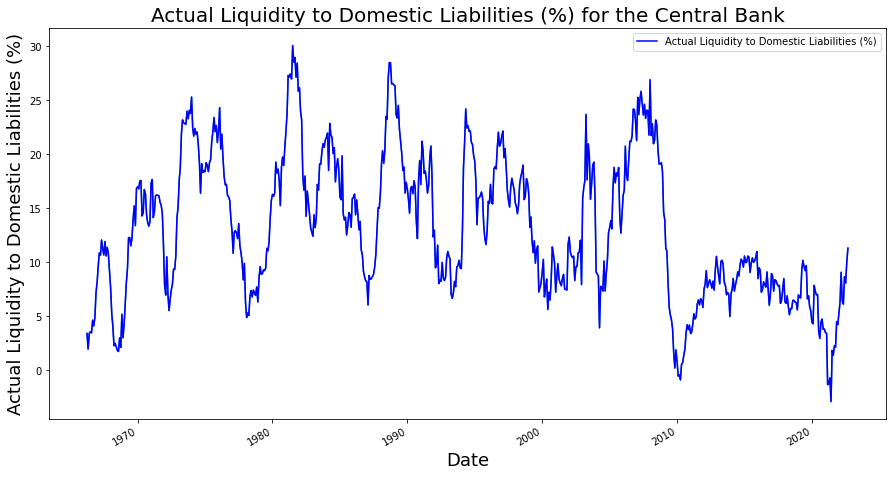

In [250]:
#Plotting the closing price as from  2005-11-16 to 2020-11-13
plt.figure(figsize=(15,8))
plt.grid(True)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Actual Liquidity to Domestic Liabilities (%)',fontsize=18)
plt.locator_params(axis="y", integer=True, tight=True)
plt.plot(dataset['Actual Liquidity to Domestic Liabilities (%)'])
plt.title('Actual Liquidity to Domestic Liabilities (%) for the Central Bank',fontsize=20)
dataset['Actual Liquidity to Domestic Liabilities (%)'].plot(legend = True,color='b')
plt.show()

##### Plot the Government Securities Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


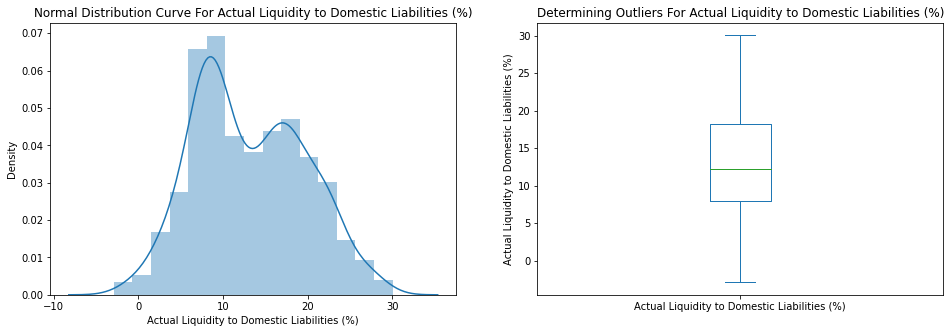

In [251]:
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Actual Liquidity to Domestic Liabilities (%)")
sns.distplot(dataset["Actual Liquidity to Domestic Liabilities (%)"]);


plt.subplot(122)
dataset["Actual Liquidity to Domestic Liabilities (%)"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Actual Liquidity to Domestic Liabilities (%)")
plt.ylabel("Actual Liquidity to Domestic Liabilities (%)")
plt.show()

##### Plot the trend for Loans and Advances to Deposits 

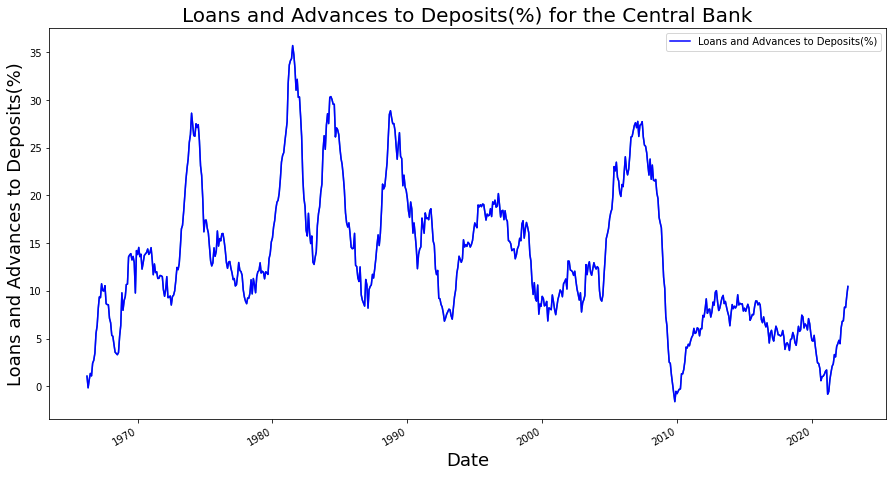

In [252]:
#Plotting the closing price as from  2005-11-16 to 2020-11-13
plt.figure(figsize=(15,8))
plt.grid(True)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Loans and Advances to Deposits(%)',fontsize=18)
plt.locator_params(axis="y", integer=True, tight=True)
plt.plot(dataset['Loans and Advances to Deposits(%)'])
plt.title('Loans and Advances to Deposits(%) for the Central Bank',fontsize=20)
dataset['Loans and Advances to Deposits(%)'].plot(legend = True,color='b')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


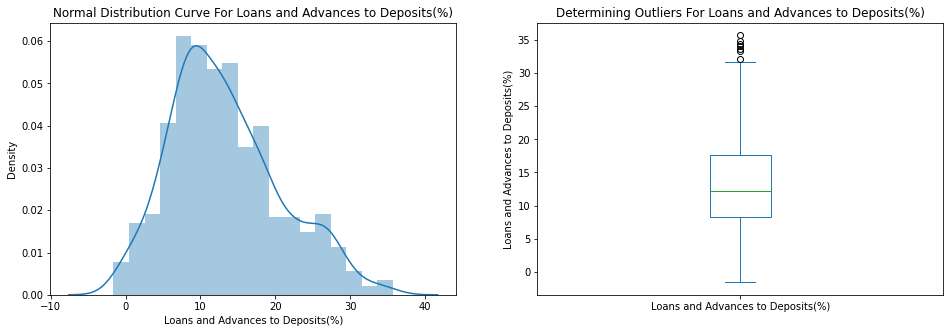

In [253]:
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Loans and Advances to Deposits(%)")
sns.distplot(dataset["Loans and Advances to Deposits(%)"]);


plt.subplot(122)
dataset["Loans and Advances to Deposits(%)"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Loans and Advances to Deposits(%)")
plt.ylabel("Loans and Advances to Deposits(%)")
plt.show()

##### Plot the trend for Currency Outside Depository Corporations

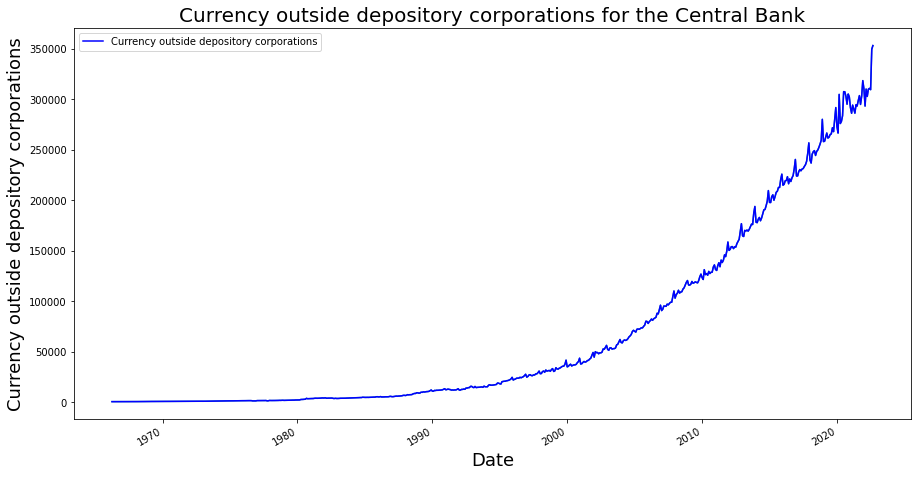

In [254]:
#Plotting the closing price as from  2005-11-16 to 2020-11-13
plt.figure(figsize=(15,8))
plt.grid(True)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Currency outside depository corporations',fontsize=18)
plt.locator_params(axis="y", integer=True, tight=True)
plt.plot(dataset['Currency outside depository corporations'])
plt.title('Currency outside depository corporations for the Central Bank',fontsize=20)
dataset['Currency outside depository corporations'].plot(legend = True,color='b')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


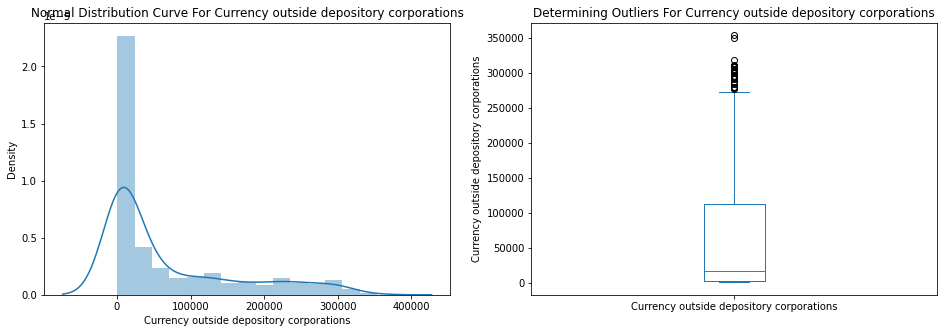

In [255]:
plt.figure(1)
plt.subplot(121)
plt.title("Normal Distribution Curve For Currency outside depository corporations")
sns.distplot(dataset["Currency outside depository corporations"]);


plt.subplot(122)
dataset["Currency outside depository corporations"].plot.box(figsize=(16,5))
plt.title("Determining Outliers For Currency outside depository corporations")
plt.ylabel("Currency outside depository corporations")
plt.show()

## 3. Feature Selection and Feature Engineering 

#### a) Plot the correlation heatmap to Determine the correlation between Variables

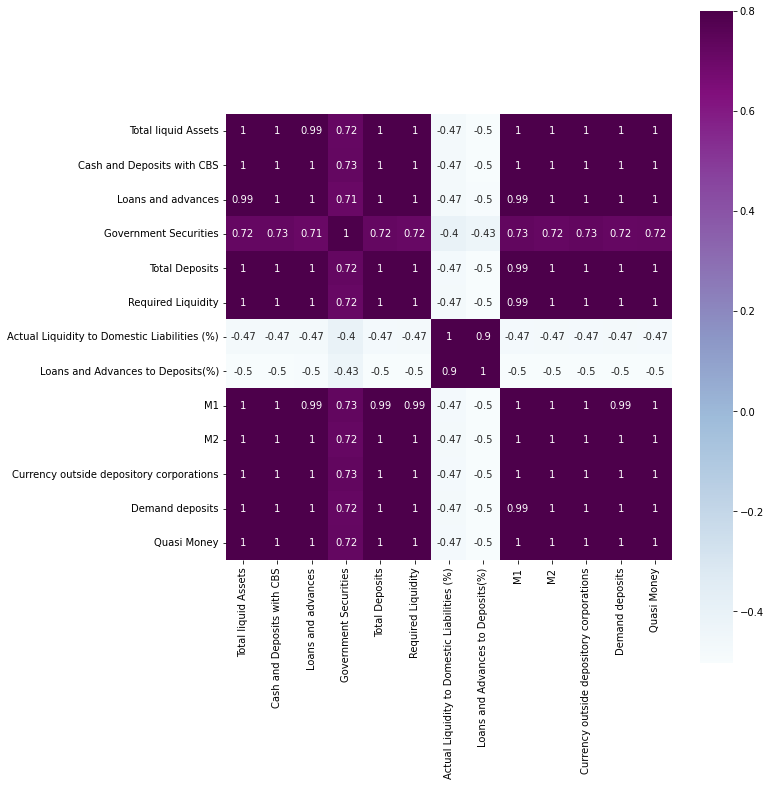

In [256]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

#### b) Get Correlated Columns to Total Liquidity

In [257]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [258]:
top_corelated_values = get_corelated_col(matrix['Total liquid Assets'], 0.60)
top_corelated_values

,corr value
Total liquid Assets,1.000000
Cash and Deposits with CBS,0.997478
Loans and advances,0.993703
Government Securities,0.723113
Total Deposits,0.997083
Required Liquidity,0.995214
M1,0.998516
M2,0.998567
Currency outside depository corporations,0.998043
Demand deposits,0.996871


In [259]:
dataset=dataset[top_corelated_values.index]
dataset.head()

,Total liquid Assets,Cash and Deposits with CBS,Loans and advances,Government Securities,Total Deposits,Required Liquidity,M1,M2,Currency outside depository corporations,Demand deposits,Quasi Money
Date,,,,,,,,,,,
2022-09-01,1191611,4664530,4032345,30381,4502731,4411197,2429923,3828429,353308,4908637,4647000
2022-08-01,1153150,4633017,3999125,25459,4473997,4360925,2428128,3789888,349666,4870965,4586933
2022-07-01,1164416,4566096,3933912,43759,4402130,4297918,2399514,3726652,309638,4763081,4549408
2022-06-01,1140303,4448948,3900423,20688,4289965,4280941,2338822,3622203,310893,4635127,4473180
2022-05-01,1142845,4475422,3848413,23706,4316521,4219158,2378735,3681214,310126,4664730,4466116


#### Pair Plot

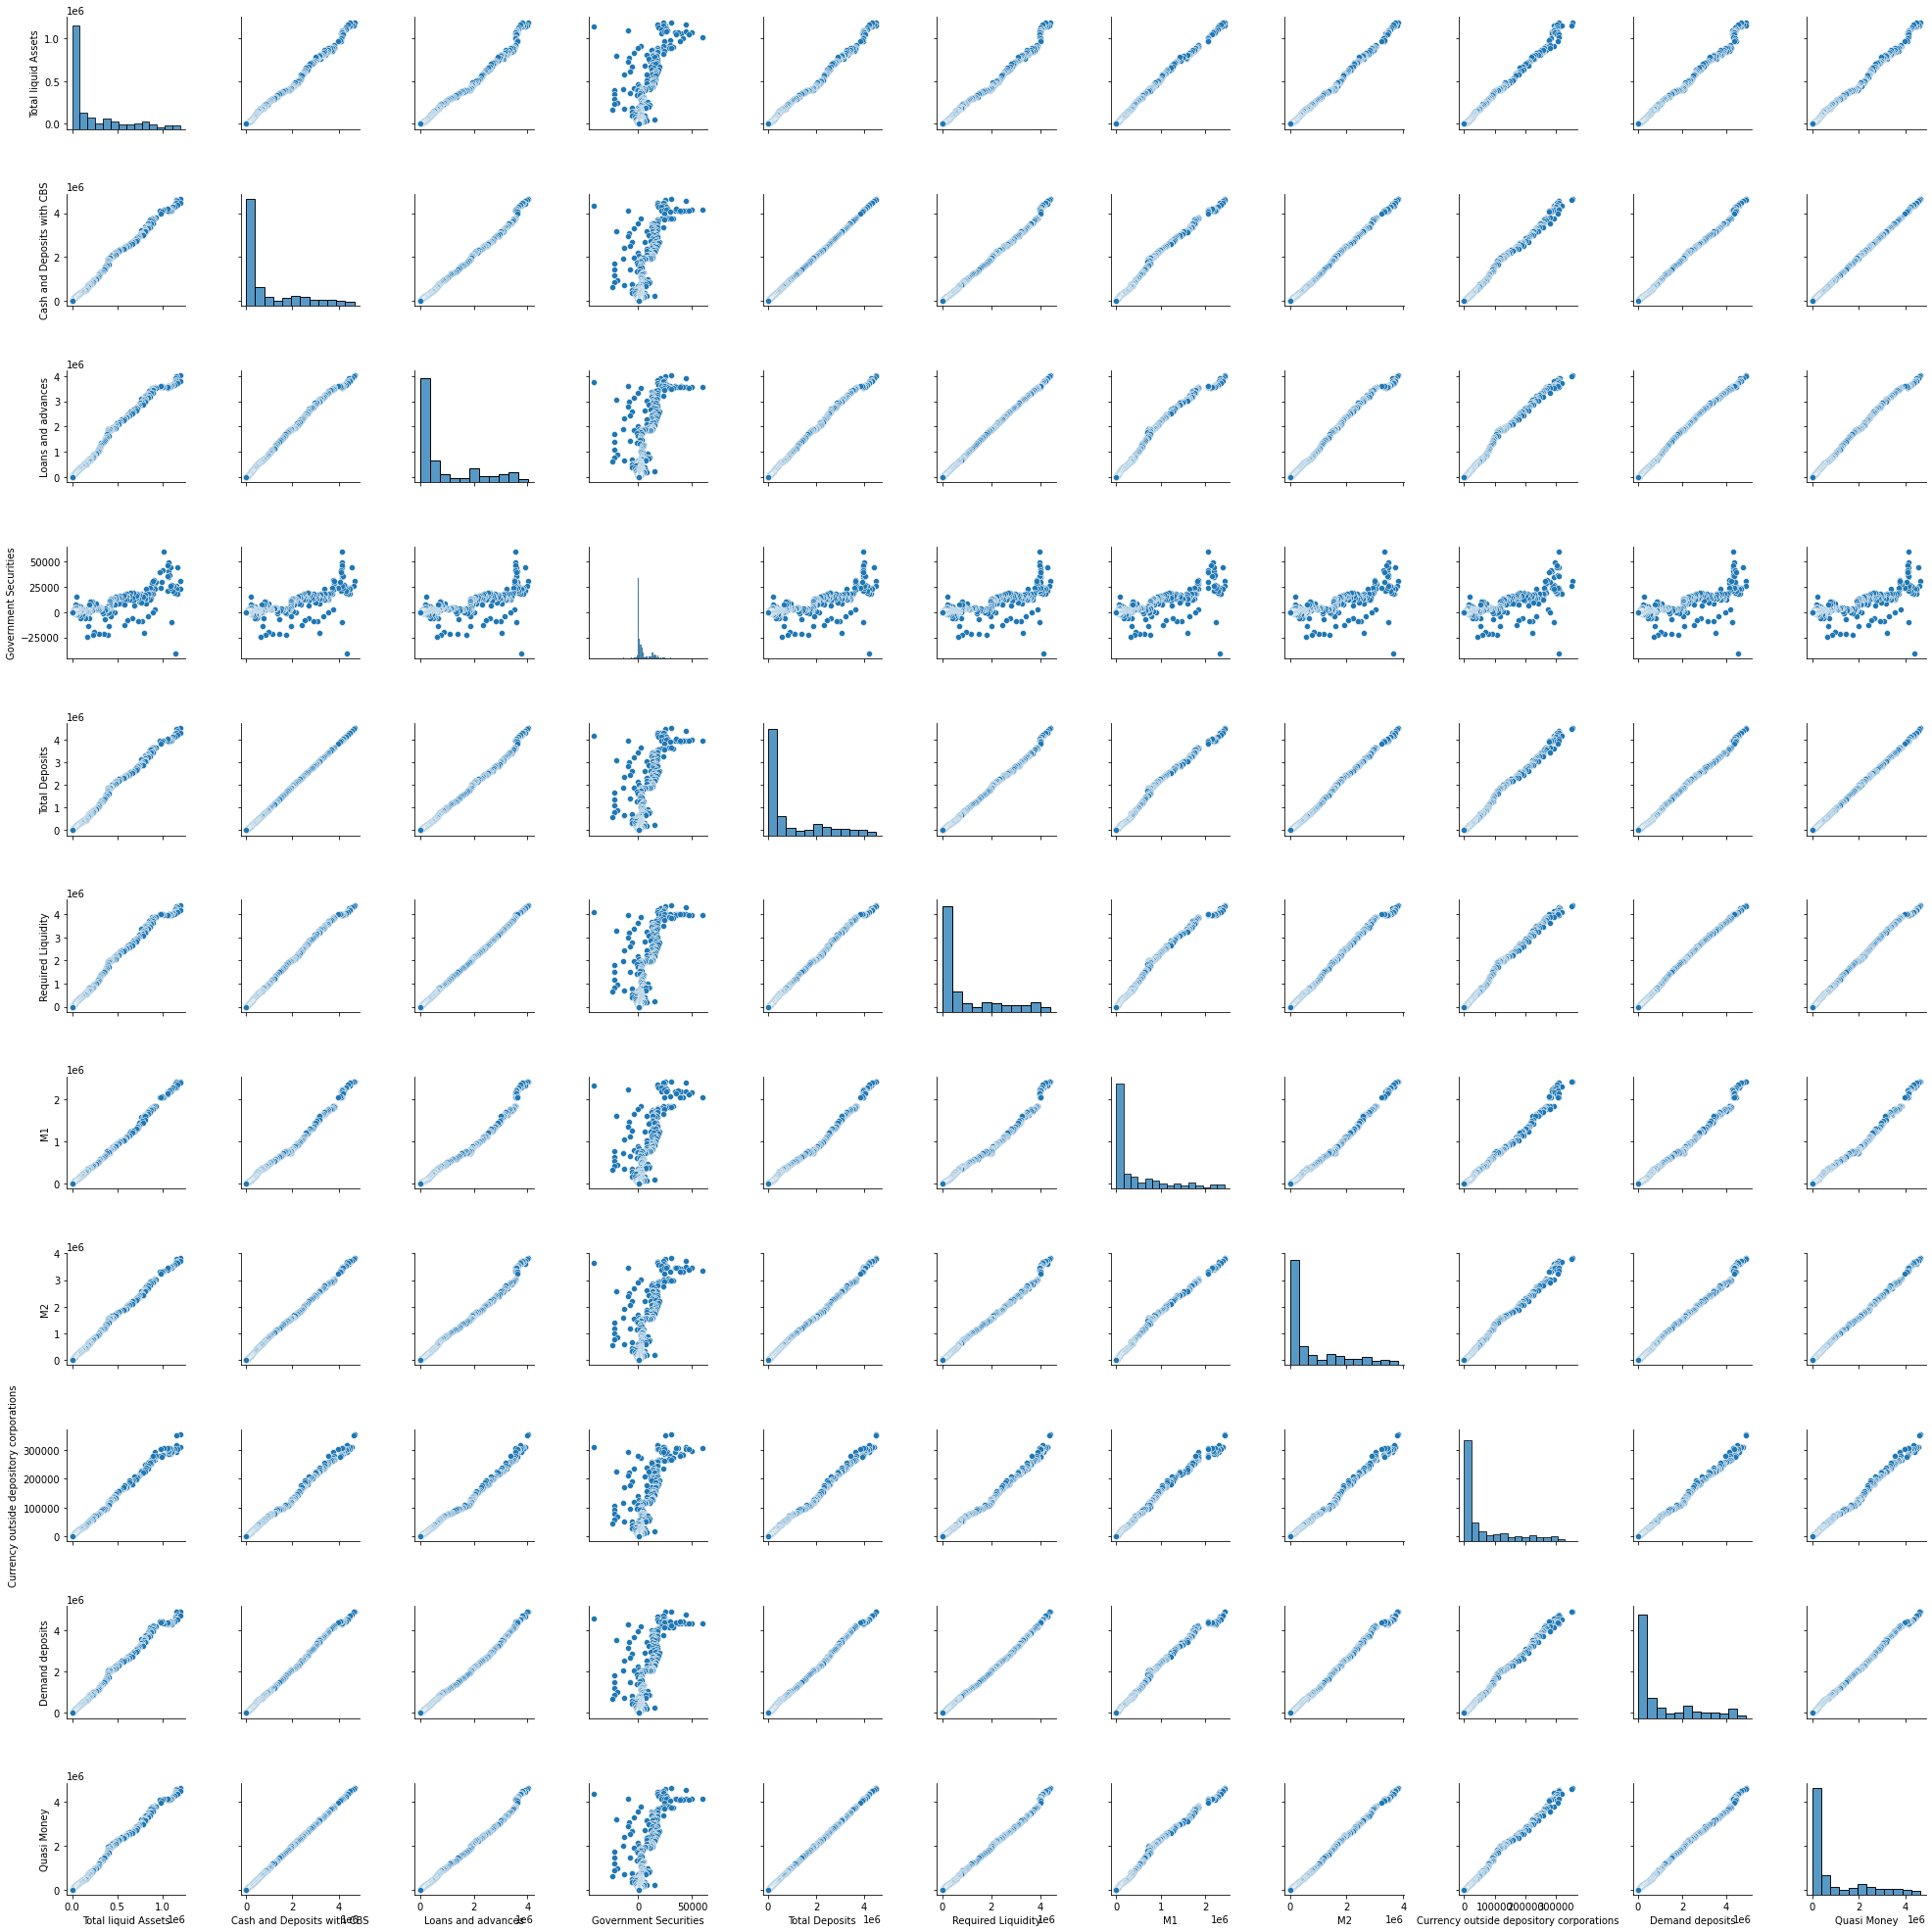

In [260]:
sns.pairplot(dataset)
plt.tight_layout()

## 4. Model Building 

#### a) Declare Feature Vector and Target Variable

In [261]:
X=dataset.drop(['Total liquid Assets'],axis=1)
y=dataset['Total liquid Assets']

#### b) Split data into seperate training and test set

In [262]:
from sklearn.model_selection import train_test_split

X_test, X_train,y_test, y_train = train_test_split(X, y, test_size = 0.8,shuffle=False)

In [263]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((542, 10), (135, 10))

In [264]:
y_test

Date
2022-09-01    1191611
2022-08-01    1153150
2022-07-01    1164416
2022-06-01    1140303
2022-05-01    1142845
               ...   
2011-11-01     495886
2011-10-01     481823
2011-09-01     480209
2011-08-01     467047
2011-07-01     469558
Name: Total liquid Assets, Length: 135, dtype: int64


## Feature Scaling 

In [265]:
cols = X_train.columns

In [266]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [267]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [268]:
X_test = pd.DataFrame(X_test, columns=[cols])

We now have X_train dataset ready to be fed into the Random Forest classifier. We will do it as follows.


### Feature Importance 

Before fitting the training dataset, we need to identify the most important feature in our dataset. 

We will use Random Forest Classifier to determine the most important feature.

In [269]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestRegressor

# instantiate the classifier 
# create the classifier with n_estimators = 100

clf = RandomForestRegressor(n_estimators=100,random_state=0)


In [270]:
# fit the model to the training set

clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [271]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Currency outside depository corporations    0.239617
M1                                          0.186856
Loans and advances                          0.141713
Required Liquidity                          0.112636
Quasi Money                                 0.092804
M2                                          0.062118
Total Deposits                              0.059967
Demand deposits                             0.059084
Cash and Deposits with CBS                  0.045130
Government Securities                       0.000074
dtype: float64

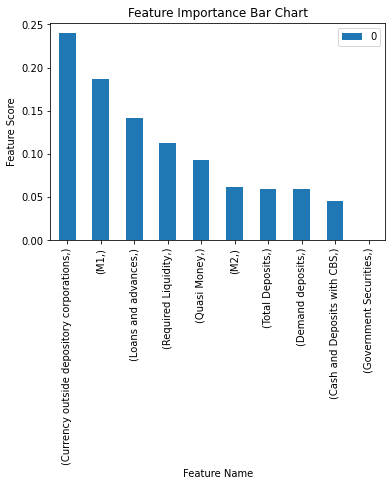

In [272]:
df = pd.DataFrame(feature_scores)
df.plot(kind='bar')
plt.title("Feature Importance Bar Chart")
plt.xlabel("Feature Name")
plt.ylabel("Feature Score")
plt.show()

# Model Building 

We will implimant the following models:
- GRU
- Radial Basis Functions Network 
- ARIMAX

## 1. GRU

In [273]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (542, 10)
y_train.shape:  (542,)
X_test.shape:  (135, 10)
y_test.shape:  (135,)


### Reshaping the dataset

In [274]:
# reshape input to be 3D [samples, time steps, features]
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(542, 1, 10) (542,) (135, 1, 10) (135,)


### GRU Model

In [275]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU,Dropout
from keras import callbacks
import tensorflow
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import regularizers

### Check results

In [276]:
#model = Sequential()
#model.add(GRU(units=256, return_sequences=True, dropout=0.3,
#recurrent_dropout=0.4, kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1], X_train.shape[2])))

#model.add(GRU(units=256, return_sequences=True,activation='relu'))
#dropout=0.25, recurrent_dropout=0.3))

#model.add(GRU(units=128,activation='relu'))
#model.add(Dense(units=1))
#,dropout=0.3, recurrent_dropout=0.35

model = Sequential()
model.add(GRU(300, return_sequences=True,dropout=0.3,
              recurrent_dropout=0.4,kernel_regularizer=regularizers.l2(0.001),input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=600, return_sequences=True,activation='relu',dropout=0.3, recurrent_dropout=0.35))
model.add(GRU(units=300,activation='relu',dropout=0.3, recurrent_dropout=0.35))
model.add(Dense(units=1))


In [277]:
model.compile(loss='mae', optimizer='adam')

In [278]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 1, 300)            280800    
                                                                 
 gru_7 (GRU)                 (None, 1, 600)            1623600   
                                                                 
 gru_8 (GRU)                 (None, 300)               811800    
                                                                 
 dense_4 (Dense)             (None, 1)                 301       
                                                                 
Total params: 2,716,501
Trainable params: 2,716,501
Non-trainable params: 0
_________________________________________________________________


In [279]:
from tensorflow.keras.optimizers import SGD

In [280]:
gru_history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/100
9/9 [==============================] - 11s 228ms/step - loss: 91411.0391 - val_loss: 800868.5625
Epoch 2/100
9/9 [==============================] - 1s 92ms/step - loss: 91409.5000 - val_loss: 800861.2500
Epoch 3/100
9/9 [==============================] - 1s 96ms/step - loss: 91400.3828 - val_loss: 800821.0625
Epoch 4/100
9/9 [==============================] - 1s 104ms/step - loss: 91357.5625 - val_loss: 800689.2500
Epoch 5/100
9/9 [==============================] - 1s 107ms/step - loss: 91232.1719 - val_loss: 800330.1250
Epoch 6/100
9/9 [==============================] - 1s 101ms/step - loss: 90914.4609 - val_loss: 799511.5000
Epoch 7/100
9/9 [==============================] - 1s 94ms/step - loss: 90265.6641 - val_loss: 797976.1250
Epoch 8/100
9/9 [==============================] - 1s 102ms/step - loss: 89336.5547 - val_loss: 795813.2500
Epoch 9/100
9/9 [==============================] - 1s 104ms/step - loss: 88358.9219 - val_loss: 793209.0625
Epoch 10/100
9/9 [============

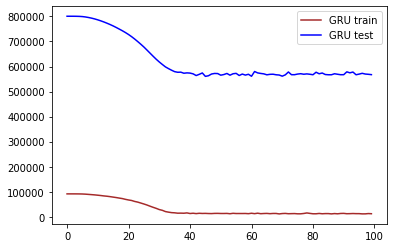

In [281]:
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [282]:
X_test.shape

(135, 1, 10)

In [283]:
yhat_test = model.predict(X_test)*4
yhat_test


5/5 [==============================] - 1s 15ms/step


array([[1686261.5  ],
       [1677826.   ],
       [1655393.2  ],
       [1633003.4  ],
       [1635230.4  ],
       [1626589.1  ],
       [1635285.6  ],
       [1606303.5  ],
       [1600914.8  ],
       [1609759.2  ],
       [1606699.2  ],
       [1579263.8  ],
       [1581768.   ],
       [1578927.4  ],
       [1562143.8  ],
       [1536309.6  ],
       [1550195.1  ],
       [1544967.8  ],
       [1538797.1  ],
       [1541278.9  ],
       [1544828.   ],
       [1550732.   ],
       [1549695.4  ],
       [1547958.   ],
       [1538275.8  ],
       [1554385.4  ],
       [1541716.2  ],
       [1524826.   ],
       [1523551.4  ],
       [1519983.2  ],
       [1513677.   ],
       [1423091.5  ],
       [1412064.6  ],
       [1423743.2  ],
       [1423965.6  ],
       [1408058.5  ],
       [1405045.4  ],
       [1405059.4  ],
       [1387630.6  ],
       [1365894.4  ],
       [1368380.8  ],
       [1366638.5  ],
       [1342789.5  ],
       [1303222.5  ],
       [1297547.6  ],
       [13

In [284]:
y_test

Date
2022-09-01    1191611
2022-08-01    1153150
2022-07-01    1164416
2022-06-01    1140303
2022-05-01    1142845
               ...   
2011-11-01     495886
2011-10-01     481823
2011-09-01     480209
2011-08-01     467047
2011-07-01     469558
Name: Total liquid Assets, Length: 135, dtype: int64

In [285]:
gru_pred_data = pd.DataFrame({'Total Liquid Assets': y_test, 'Predicted': yhat_test.flatten()})
gru_pred_data.head()

,Total Liquid Assets,Predicted
Date,,
2022-09-01,1191611,1686261.500
2022-08-01,1153150,1677826.000
2022-07-01,1164416,1655393.250
2022-06-01,1140303,1633003.375
2022-05-01,1142845,1635230.375


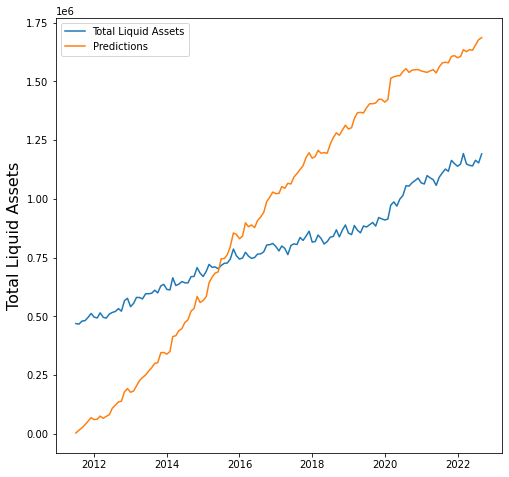

In [286]:
plt.figure(figsize=(8,8))
plt.ylabel('Total Liquid Assets', fontsize=16)
plt.plot(gru_pred_data)
plt.legend(['Total Liquid Assets', 'Predictions'])
plt.show()

### Evaluation Metrics For GRU

In [287]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [288]:
print('MAE:', metrics.mean_absolute_error(y_test,yhat_test))
print('MSE:', metrics.mean_squared_error(y_test,yhat_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,yhat_test)))
print('MAPE:', mean_absolute_percentage_error(y_test, yhat_test)*100,"%")

MAE: 343163.45293692127
MSE: 139975303394.10214
RMSE: 374132.73499401537
MAPE: 44.42179499463501 %


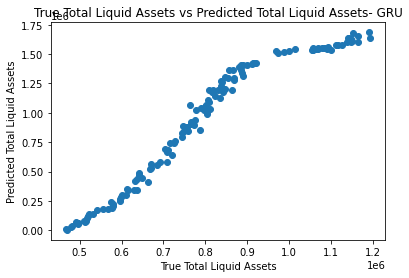

In [289]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,yhat_test,)
plt.xlabel("True Total Liquid Assets")
plt.ylabel("Predicted Total Liquid Assets")
plt.title("True Total Liquid Assets vs Predicted Total Liquid Assets- GRU")
plt.show()

## Radial Basis Function Networks

In [290]:
from keras import backend as K
from tensorflow.keras.layers import Layer
from keras.initializers import RandomUniform, Initializer, Constant
import numpy as np

In [291]:
X=dataset.drop(['Total liquid Assets'],axis=1)
y=dataset['Total liquid Assets']

In [292]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.8, shuffle=False)

In [293]:
cols = X_train.columns

In [294]:
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.fit_transform(X_test)
X = scaler1.fit_transform(X)

In [295]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [296]:
X_test = pd.DataFrame(X_test, columns=[cols])
y_test

Date
2022-09-01    1191611
2022-08-01    1153150
2022-07-01    1164416
2022-06-01    1140303
2022-05-01    1142845
               ...   
2011-11-01     495886
2011-10-01     481823
2011-09-01     480209
2011-08-01     467047
2011-07-01     469558
Name: Total liquid Assets, Length: 135, dtype: int64

In [297]:

class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.

    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
      assert shape[1] == self.X.shape[1]
      idx = np.random.randint(self.X.shape[0], size=shape[0])
      if type(self.X) == np.ndarray:
        return self.X[idx, :]
      elif type(self.X) == pd.core.frame.DataFrame:
        return self.X.iloc[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.

    # Example

    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```


    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas

    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [298]:
# creating RBF network
rbflayer = RBFLayer(10,
                      initializer=InitCentersRandom(X),
                      betas=2.0,
                      input_shape=([10]))

model_rbf = Sequential()
model_rbf.add(rbflayer)
model_rbf.add(Dense(1,activation = 'relu'))
#use_bias=False,

In [299]:
model_rbf.compile(loss='mae', optimizer='adam')

In [300]:
model_rbf.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_2 (RBFLayer)      (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [301]:
rbf_history = model_rbf.fit(X_train, y_train, epochs=4000, batch_size=50, validation_data=(X_test, y_test), shuffle=False)

Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
11/11 [==============================] - 0s 12ms/step - loss: 58627.2891 - val_loss: 713176.5625
Epoch 1502/4000
11/11 [==============================] - 0s 8ms/step - loss: 58513.6406 - val_loss: 719034.8750
Epoch 1503/4000
11/11 [==============================] - 0s 9ms/step - loss: 58450.2578 - val_loss: 712329.5625
Epoch 1504/4000
11/11 [==============================] - 0s 7ms/step - loss: 58574.8984 - val_loss: 720381.2500
Epoch 1505/4000
11/11 [==============================] - 0s 9ms/step - loss: 58578.2812 - val_loss: 712788.2500
Epoch 1506/4000
11/11 [==============================] - 0s 9ms/step - loss: 58493.3945 - val_loss: 718599.2500
Epoch 1507/4000
11/11 [==============================] - 0s 7ms/step - loss: 58394.3516 - val_loss: 711829.3750
Epoch 1508/4000
11/11 [==============================] - 0s 9ms/step - loss: 58567.4258 - val_loss: 719865.6875
Epoch 1509/4000
11/11 [=============================

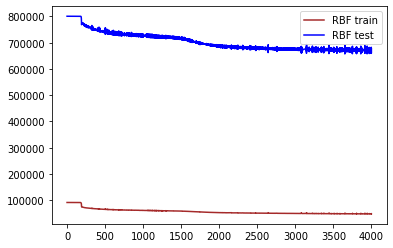

In [302]:
pyplot.plot(rbf_history.history['loss'], label='RBF train', color='brown')
pyplot.plot(rbf_history.history['val_loss'], label='RBF test', color='blue')
pyplot.legend()
pyplot.show()

In [303]:
yhat_test_pred =(model_rbf.predict(X_test))*2.5
yhat_test_pred


5/5 [==============================] - 0s 3ms/step


array([[1536302.2  ],
       [1480898.   ],
       [1098447.6  ],
       [1161677.   ],
       [1126532.6  ],
       [1166094.9  ],
       [1125211.   ],
       [ 964638.   ],
       [2079602.4  ],
       [ 939104.6  ],
       [ 963042.25 ],
       [ 750403.75 ],
       [ 788145.56 ],
       [ 770429.94 ],
       [ 666308.44 ],
       [ 599848.5  ],
       [ 650928.3  ],
       [ 614023.5  ],
       [ 898591.8  ],
       [ 522758.47 ],
       [ 555787.75 ],
       [ 496682.25 ],
       [ 527241.6  ],
       [ 477402.78 ],
       [ 451462.47 ],
       [ 550760.4  ],
       [ 406518.06 ],
       [ 485098.56 ],
       [ 509344.94 ],
       [ 561392.8  ],
       [ 514450.75 ],
       [ 390003.2  ],
       [ 499675.12 ],
       [ 373676.7  ],
       [ 361268.44 ],
       [ 359379.1  ],
       [ 334290.9  ],
       [ 352794.72 ],
       [ 365621.   ],
       [ 353953.16 ],
       [ 338373.72 ],
       [ 348647.3  ],
       [ 326536.   ],
       [ 303676.75 ],
       [ 309541.53 ],
       [ 3

In [304]:
print('MAE:', metrics.mean_absolute_error(y_test,yhat_test_pred))
print('MSE:', metrics.mean_squared_error(y_test,yhat_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,yhat_test_pred)))
accuracy=(metrics.r2_score(y_test,yhat_test_pred,multioutput='variance_weighted')*-100,"%")
print('MAPE:', mean_absolute_percentage_error(y_test, yhat_test_pred)*100,"%")

MAE: 517086.2657696759
MSE: 286148734980.9589
RMSE: 534928.7195327607
MAPE: 69.70377289820253 %


In [305]:
rbf_pred_data = pd.DataFrame({'Total Liquid Assets': y_test, 'Predicted': yhat_test_pred.flatten()})
rbf_pred_data.head()

,Total Liquid Assets,Predicted
Date,,
2022-09-01,1191611,1536302.250
2022-08-01,1153150,1480898.000
2022-07-01,1164416,1098447.625
2022-06-01,1140303,1161677.000
2022-05-01,1142845,1126532.625


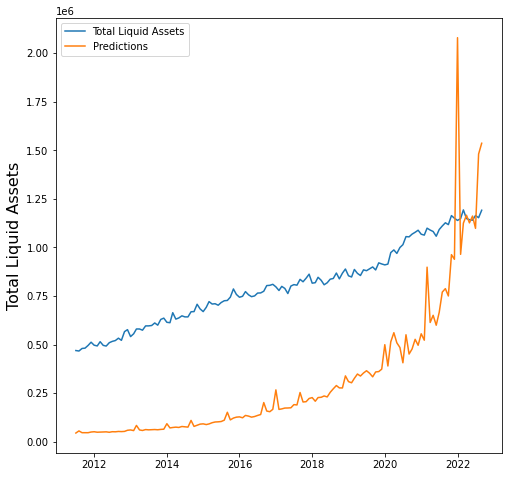

In [306]:
plt.figure(figsize=(8,8))
plt.ylabel('Total Liquid Assets', fontsize=16)
plt.plot(rbf_pred_data)
plt.legend(['Total Liquid Assets', 'Predictions'])
plt.show()

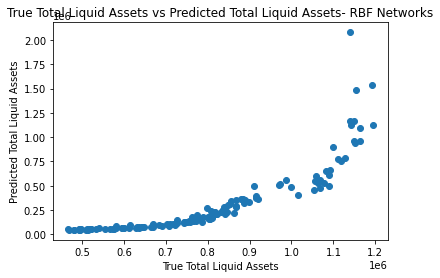

In [307]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,yhat_test_pred,)
plt.xlabel("True Total Liquid Assets")
plt.ylabel("Predicted Total Liquid Assets")
plt.title("True Total Liquid Assets vs Predicted Total Liquid Assets- RBF Networks")
plt.show()

## ARIMAX

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

In [308]:
!pip3 install numpy scipy patsy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [309]:
!pip3 install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [310]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [311]:
import pmdarima as pm

ImportError: ignored

In [ ]:
print(type(dataset0))

In [ ]:
test=dataset0.iloc[:math.ceil(len(dataset)*0.2)]
train=dataset0.iloc[math.ceil(len(dataset)*0.2):]
     

In [ ]:
test=pd.DataFrame(test)

In [ ]:
test["Total liquid Assets"].tail()

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
test_index=test.index

Total liquid Assets	Cash and Deposits with CBS	Loans and advances	Government Securities	Total Deposits	Required Liquidity	Actual Liquidity to Domestic Liabilities (%)	Loans and Advances to Deposits(%)	M1	M2	Currency outside depository corporations	Demand deposits	Quasi Money

In [ ]:
#dataset1=dataset.drop(columns=['Total liquid Assets'])

In [ ]:
# list(data) or
#list(dataset1.columns)

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
model = pm.auto_arima(train['Total liquid Assets'], exogenous=train[exogenous_features], trace=True,
                      error_action="ignore", suppress_warnings=True)
model.fit(train['Total liquid Assets'], exogenous=train[exogenous_features])

forecast = (model.predict(n_periods=len(test), exogenous=test[exogenous_features])).to_frame()
forecast1=forecast*150
#test["Forecast"] = forecast*100

In [ ]:
#forecast1=forecast1.reset_index(drop=True)
#forecast1

In [ ]:
forecast2=forecast1.sort_index(ascending=False)
forecast3=forecast2.reset_index(drop=True)
forecast3

In [ ]:
forecast4=forecast3.set_index(test_index)
forecast4


In [ ]:
# Join two DataFrames
test2=test['Total liquid Assets']
df=pd.DataFrame(test2)
df['Forecast']=forecast4
df1=df.drop(columns=['Forecast'])
df1['Forecast']=forecast4
df2=df1
df2

### Evaluation Metrics For ARIMAX

In [ ]:
print('MAE:', metrics.mean_absolute_error(df2["Total liquid Assets"],df2["Forecast"]))
print('MSE:', metrics.mean_squared_error(df2["Total liquid Assets"],df2["Forecast"]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df2["Total liquid Assets"],df2["Forecast"])))
print("Accuracy Radial Basis Function Networks:",metrics.r2_score(df2["Total liquid Assets"],df2["Forecast"],multioutput='variance_weighted')*-100,"%")

In [ ]:
df2[["Total liquid Assets", "Forecast"]].plot(figsize=(14, 7))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(df2["Total liquid Assets"],df2["Forecast"])
plt.xlabel("True Total Liquid Assets")
plt.ylabel("Predicted Total Liquid Assets")
plt.title("True Total Liquid Assets vs Predicted Total Liquid Assets- ARIMAX")
plt.show()